###  Created by Luis A. Sanchez-Perez (alejand@umich.edu)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Importing the dataset
dataset = pd.read_csv('../../datasets/classification/social.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Select only two features to work with
features = [2,3]
X = dataset.iloc[:, features].values
y = dataset.iloc[:, 4].values

In [5]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [6]:
# Fitting Naive Bayes to the training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)
print(classifier.sigma_,end="\n")
print(classifier.theta_)

[[6.18097607e+01 6.76753802e+08]
 [7.57059072e+01 1.73177739e+09]]
[[3.27171717e+01 6.05353535e+04]
 [4.64901961e+01 8.23529412e+04]]


In [7]:
# Predicting the training set results
y_pred = classifier.predict(X_train)
# Making the Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
print(cm)
print(accuracy_score(y_train,y_pred))

[[183  15]
 [ 18  84]]
0.89


In [8]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[56  3]
 [ 9 32]]
0.88


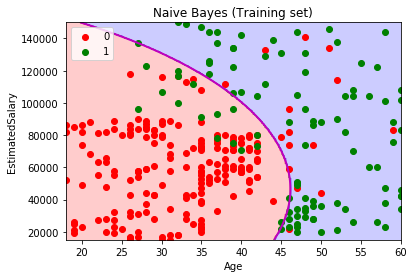

In [9]:
# Visualising the training set results
color_map = ListedColormap(('red', 'green', 'blue'))
pts = 200
x1 = np.linspace(X[:, 0].min(),X[:, 0].max(),pts)
x2 = np.linspace(X[:, 1].min(),X[:, 1].max(), pts)
X1, X2 = np.meshgrid(x1,x2)

obs = np.array([X1.ravel(), X2.ravel()]).T
y_pred = classifier.predict(obs)
plt.contourf(X1, X2, y_pred.reshape(X1.shape), alpha = 0.20, cmap = color_map)
y_prob = classifier.predict_proba(obs)[:,0]
plt.contour(X1, X2, y_prob.reshape(X1.shape), levels=[0.5], colors='m',linewidths=2)
for i, value in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train == value, 0], X_train[y_train == value, 1],
                c = np.array(color_map(i)).reshape(1,4), label = value)
    
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Naive Bayes (Training set)')
plt.xlabel(dataset.columns[features[0]])
plt.ylabel(dataset.columns[features[1]])
plt.legend()
plt.show()

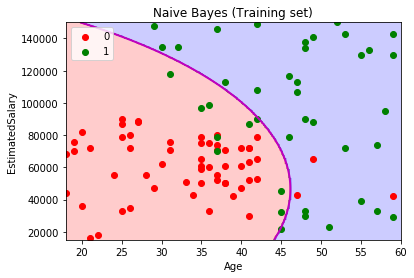

In [10]:
# Visualising the test set results
color_map = ListedColormap(('red', 'green', 'blue'))
pts = 200
x1 = np.linspace(X[:, 0].min(),X[:, 0].max(),pts)
x2 = np.linspace(X[:, 1].min(),X[:, 1].max(), pts)
X1, X2 = np.meshgrid(x1,x2)

obs = np.array([X1.ravel(), X2.ravel()]).T
y_pred = classifier.predict(obs)
plt.contourf(X1, X2, y_pred.reshape(X1.shape), alpha = 0.20, cmap = color_map)
y_prob = classifier.predict_proba(obs)[:,0]
plt.contour(X1, X2, y_prob.reshape(X1.shape), levels=[0.5], colors='m',linewidths=2)
for i, value in enumerate(np.unique(y_train)):
    plt.scatter(X_test[y_test == value, 0], X_test[y_test == value, 1],
                c = np.array(color_map(i)).reshape(1,4), label = value)
    
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Naive Bayes (Training set)')
plt.xlabel(dataset.columns[features[0]])
plt.ylabel(dataset.columns[features[1]])
plt.legend()
plt.show()

In [11]:
# Creates X with all features now
X = dataset.iloc[:, 1:4].values
is_male = (X[:,0] == 'Male')
X[is_male,0] = 0 
X[~is_male,0] = 1 
y = dataset.iloc[:, 4].values
X

array([[0, 19, 19000],
       [0, 35, 20000],
       [1, 26, 43000],
       ...,
       [1, 50, 20000],
       [0, 36, 33000],
       [1, 49, 36000]], dtype=object)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
# The gender feature here is not contributing much
print('Number of males:', is_male.sum())
print('Number of women:', (~is_male).sum())
print('Mean of distribution (Gaussian) for gender feature: ', '%.2lf' % classifier.theta_[0,0])

Number of males: 196
Number of women: 204
Mean of distribution (Gaussian) for gender feature:  0.48


In [14]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[59  2]
 [ 5 34]]
0.93


In [15]:
# Predicting the test set results
y_pred = classifier.predict(X_train)
# Making the Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
print(cm)
print(accuracy_score(y_train,y_pred))

[[182  14]
 [ 26  78]]
0.8666666666666667
